In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import cPickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
%matplotlib inline
from keras.datasets import cifar10
import cv2

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


fliping data for data augmentation:

In [3]:
flip_train=X_train[:,:,::-1,:]

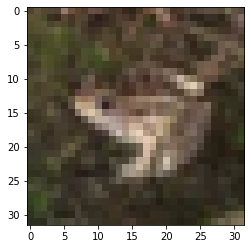

In [4]:
plt.imshow(flip_train[22])

resizing  train data to 16x16:

(100000, 16, 16, 3)

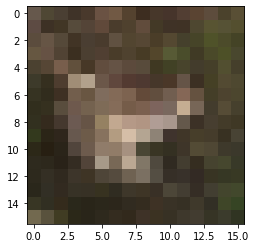

In [5]:
temp=[]
for i in range(50000):
    temp.append(cv2.resize(X_train[i],(16,16)))

for i in range(50000):
  temp.append(cv2.resize(flip_train[i],(16,16)))

    
    
data=np.array(temp)

plt.imshow(data[22])
data.shape

In [6]:
y_=to_categorical(y_train)
y_Train=np.concatenate((y_,y_))
y_Train.shape

(100000, 10)

resizing  test data to 16x16:


In [7]:
temp=[]
for i in range(10000):
    temp.append(cv2.resize(X_test[i],(16,16)))
    
    
    
data_test=np.array(temp)

data_test.shape

(10000, 16, 16, 3)

In [8]:
y_Test=to_categorical(y_test)
y_Test.shape

(10000, 10)

flattening and normaize data:

In [9]:
x_flatten=data.reshape(100000,-1)
x_flatten=x_flatten/255

x_test=data_test.reshape(10000,-1)

x_test=x_test/255

print(x_test.shape)
print(x_flatten.shape)

(10000, 768)
(100000, 768)


constructing model

In [10]:
model=Sequential()
model.add(Dense(1000,activation='relu',input_dim=768))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              769000    
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 2,275,510
Trainable params: 2,275,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(x_flatten,y_Train,batch_size=128,epochs=80,validation_data=(x_test,y_Test))

Epoch 1/80
782/782 [==============================] - 8s 7ms/step - loss: 1.7210 - accuracy: 0.3778 - val_loss: 1.5811 - val_accuracy: 0.4311
Epoch 2/80
782/782 [==============================] - 5s 6ms/step - loss: 1.5115 - accuracy: 0.4583 - val_loss: 1.4787 - val_accuracy: 0.4667
Epoch 3/80
782/782 [==============================] - 5s 6ms/step - loss: 1.4256 - accuracy: 0.4889 - val_loss: 1.4560 - val_accuracy: 0.4849
Epoch 4/80
782/782 [==============================] - 5s 6ms/step - loss: 1.3535 - accuracy: 0.5157 - val_loss: 1.3801 - val_accuracy: 0.5067
Epoch 5/80
782/782 [==============================] - 5s 6ms/step - loss: 1.2808 - accuracy: 0.5400 - val_loss: 1.3729 - val_accuracy: 0.5121
Epoch 6/80
782/782 [==============================] - 5s 6ms/step - loss: 1.2206 - accuracy: 0.5621 - val_loss: 1.3753 - val_accuracy: 0.5123
Epoch 7/80
782/782 [==============================] - 5s 6ms/step - loss: 1.1634 - accuracy: 0.5814 - val_loss: 1.3428 - val_accuracy: 0.5272
Epoch 

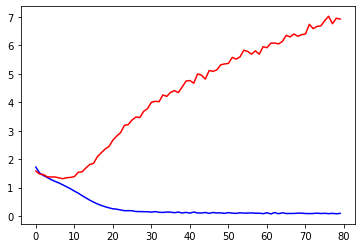

In [13]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.show()

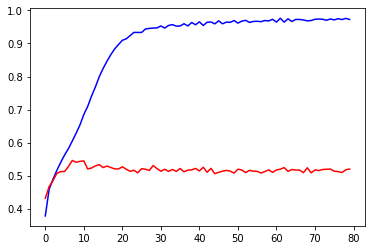

In [14]:
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r-')
plt.show()

In [15]:
max(history.history['val_accuracy'])

0.5457000136375427

In [16]:
max(history.history['accuracy'])

0.9764400124549866

plotting confiusion matrix and calculat acc,pre,f1

In [17]:
from tensorflow.math import confusion_matrix     

In [18]:
u=model.predict(x_test)
index = np.argmax(u, axis=-1)
y=np.argmax(y_Test, axis=-1)

In [19]:
cm=tf.math.confusion_matrix(y,index)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[586,  39,  60,  38,  39,  22,  22,  28, 127,  39],
       [ 37, 585,  35,  19,  10,  17,  21,  32,  95, 149],
       [ 62,  13, 429,  71, 135, 103,  73,  79,  18,  17],
       [ 26,  20, 116, 335,  75, 185, 109,  69,  28,  37],
       [ 30,   4, 148,  66, 430,  84,  95, 102,  28,  13],
       [ 15,  10,  87, 185,  65, 426,  78,  91,  25,  18],
       [ 10,  16, 108,  69, 114,  67, 559,  25,  12,  20],
       [ 42,  15,  68,  56,  71,  68,  28, 611,  13,  28],
       [ 89,  62,  29,  32,  34,  22,  11,  11, 661,  49],
       [ 51, 135,  21,  27,  10,  31,  27,  47,  75, 576]], dtype=int32)>

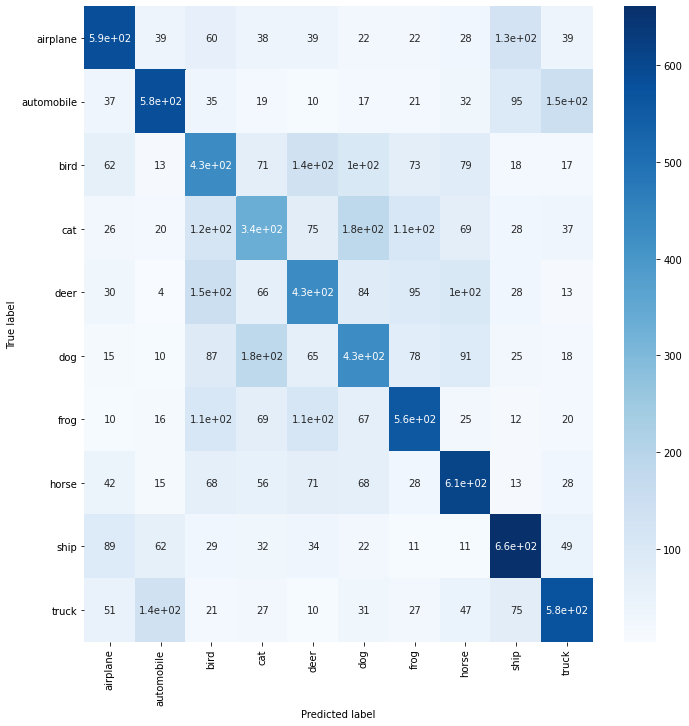

In [21]:
import seaborn as sns
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

figure = plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
colums=np.sum(cm,axis=0)

rows=np.sum(cm,axis=1)

tp=np.array([cm[0][0],cm[1][1],cm[2][2],cm[3][3],cm[4][4],cm[5][5],cm[6][6],cm[7][7],cm[8][8],cm[9][9]])


recalls=tp/colums
precisions=tp/rows

In [23]:
recalls

array([0.61814346, 0.65072303, 0.38964578, 0.37305122, 0.43743642,
       0.41560976, 0.54643206, 0.55799087, 0.61090573, 0.60887949])

In [24]:
precisions

array([0.586, 0.585, 0.429, 0.335, 0.43 , 0.426, 0.559, 0.611, 0.661,
       0.576])

In [25]:
f1=(2*(recalls*precisions))/(recalls+precisions)
f1

array([0.60164271, 0.61611374, 0.40837696, 0.35300316, 0.43368633,
       0.42074074, 0.55264459, 0.58329356, 0.63496638, 0.59198356])